# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [2]:
# WRITE YOUR CODE HERE
n_size <- 100
sd_x <- 25
sd_e <- 50
b0 <- 5
b1_x <- 5
b2_x2 <- 10
b3_x3 <- 15
gen_x <- rnorm(n_size,0,sd_x)
gen_eps <- rnorm(n_size,0,sd_e)

gen_y <- b0 + b1_x*gen_x + b2_x2*gen_x^2 + b3_x3*gen_x^3 + gen_eps

d1 <- data.frame(y=gen_y, x1=gen_x, x2=gen_x^2, x3=gen_x^3, x4=gen_x^4, x5=gen_x^5, x6=gen_x^6, x7=gen_x^7, x8=gen_x^8, x9=gen_x^9, x10=gen_x^10)
head(d1)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5914.43224,7.1025666,50.44645169,358.2992806,2.544844e+03,1.807493e+04,1.283784e+05,9.118159e+05,6.476233e+06,4.599788e+07,3.267030e+08
2,8224.44575,7.9762749,63.62096175,507.4582822,4.047627e+03,3.228498e+04,2.575139e+05,2.054002e+06,1.638328e+07,1.306776e+08,1.042320e+09
3,114212.15088,19.4486664,378.25062579,7356.4702467,1.430735e+05,2.782589e+06,5.411765e+07,1.052516e+09,2.047004e+10,3.981149e+11,7.742804e+12
4,-13.17385,-0.2733166,0.07470199,-0.0204173,5.580387e-03,-1.525213e-03,4.168660e-04,-1.139364e-04,3.114072e-05,-8.511276e-06,2.326273e-06
5,428907.02588,30.3550935,921.43170134,27970.1454474,8.490364e+05,2.577258e+07,7.823290e+08,2.374767e+10,7.208628e+11,2.188186e+13,6.642258e+14
6,877.79100,3.7034382,13.71545468,50.7943391,1.881137e+02,6.966675e+02,2.580065e+03,9.555111e+03,3.538676e+04,1.310527e+05,4.853455e+05


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [6]:
# WRITE YOUR CODE HERE
library(tidyverse)
#install.packages("leaps")
library(leaps)

regfit.full = regsubsets(y~., d1, nvmax=10)
reg.summary = summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(y ~ ., d1, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
5  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " "*"
6  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " " "
7  ( 1 )  "*" "*" "*" " " " " " " "*" "*" "*" "*"
8  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
#Subset selection object
#Call: regsubsets.formula(y ~ ., d1)
#10 Variables  (and intercept)
#    Forced in Forced out
#x1      FALSE      FALSE
#x2      FALSE      FALSE
#x3      FALSE      FALSE
#x4      FALSE      FALSE
#x5      FALSE      FALSE
#x6      FALSE      FALSE
#x7      FALSE      FALSE
#x8      FALSE      FALSE
#x9      FALSE      FALSE
#x10     FALSE      FALSE
#1 subsets of each size up to 8
#Selection Algorithm: exhaustive
#          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10
#1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
#2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
#3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
#4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
#5  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " "*"
#6  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " " "
#7  ( 1 )  "*" "*" "*" " " " " " " "*" "*" "*" "*"
#8  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" " "
#9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
#10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

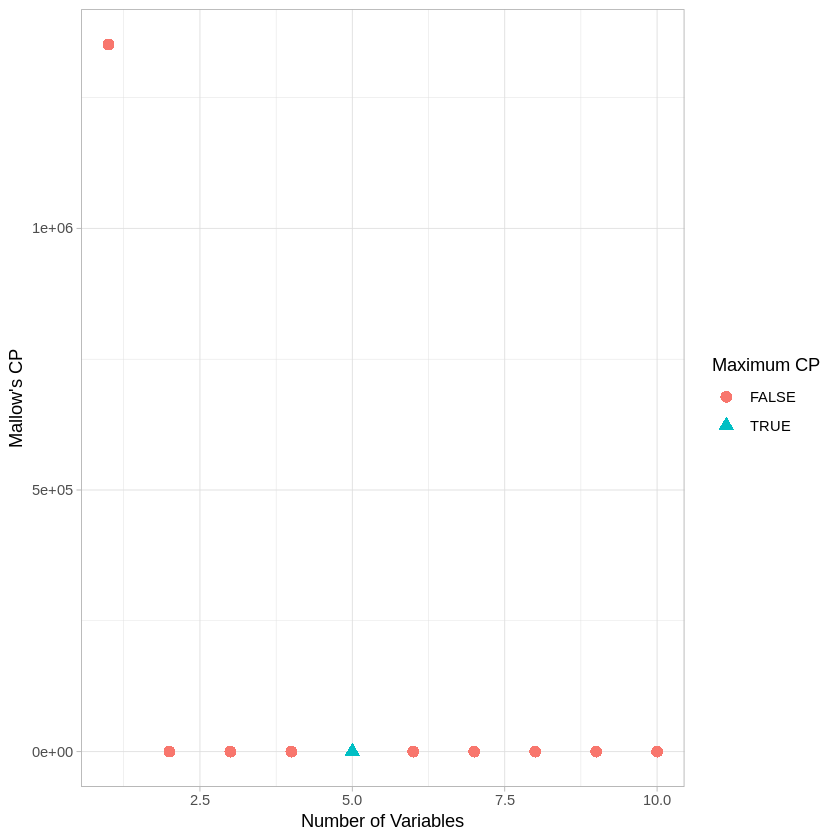

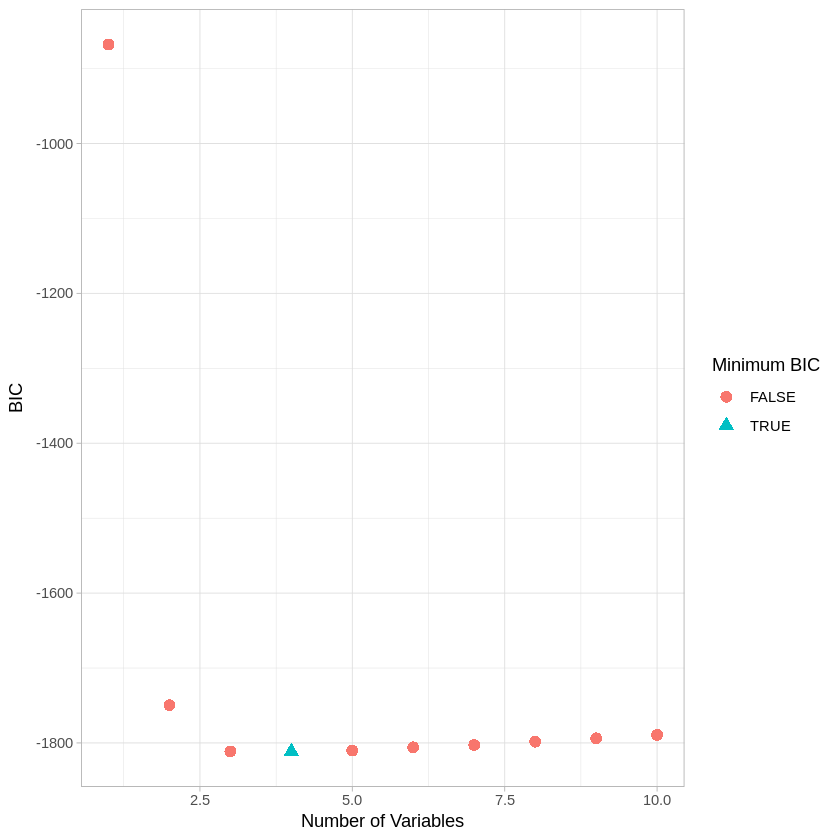

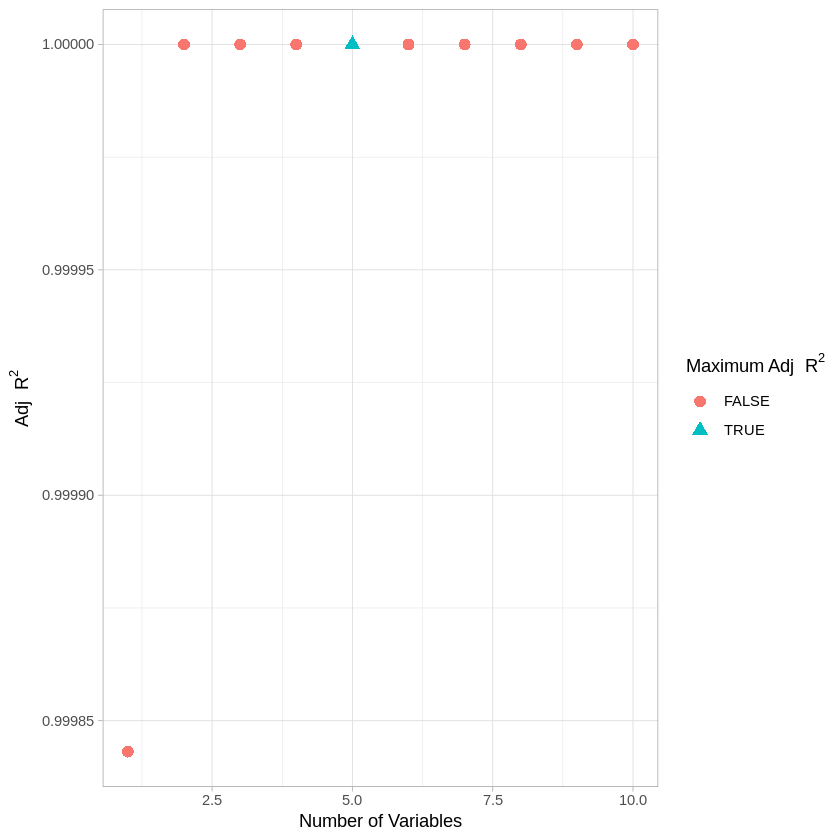

Model with best Mallows' CP: 5 
Model with best BIC: 4 
Model with best Adj R^2: 5 


(Intercept)           x1           x2           x3           x4 
1.071597e+01 4.211716e+00 9.956766e+00 1.500046e+01 2.037745e-05

(Intercept)            x1            x2            x3            x6 
 1.297424e+01  4.737754e+00  9.941467e+00  1.499991e+01  2.657174e-08 
          x10 
-1.935827e-15

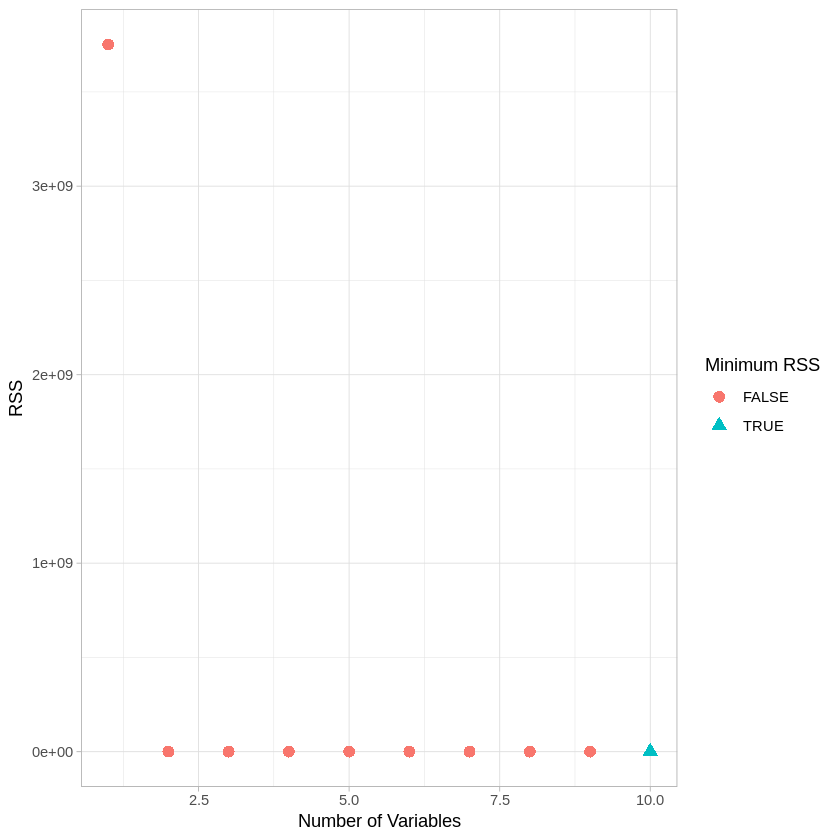

In [15]:
# WRITE YOUR CODE HERE
numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19.
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.


#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#rss
rss.df <- data.frame(numvar = numvar, rss = reg.summary$rss, minrss = allfalse)
rss.df$minrss[which.min(reg.summary$rss)] <- TRUE
ggplot(rss.df,aes(x=numvar,y=rss,shape=minrss,col=minrss)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "RSS", color="Minimum RSS", shape="Minimum RSS")


cat("Model with best Mallows' CP:", which.min(reg.summary$cp), "\n")
cat("Model with best BIC:", which.min(reg.summary$bic), "\n")
cat("Model with best Adj R^2:", which.max(reg.summary$adjr2), "\n")

#          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10
#4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
coef(regfit.full, 4)

#          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10
#5  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " "*"
coef(regfit.full, 5)

> *Write your response here*
>

The Model with the best Mallows' CP & Adj R^2 includes 5 predictors: x1, x2, x3, x6, x10.
The coeffcients are:
(Intercept): 12.9742372260686
x1:  4.73775382771321
x2:  9.94146743198132
x3:  14.9999122017179
x6:  2.65717389641519e-08
x10: -1.93582720255884e-15

The Model with best BIC includes 4 predictors: x1, x2, x3, x4.
(Intercept): 10.7159699622977
x1:  4.21171570263735
x2:  9.95676625715304
x3:  15.0004636053301
x4:  2.03774534195107e-05

I also notice that these models have very small beta coefficients for the variables besides x1, x2, and x3 (which are the ones we know should be related to y)


---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

In [24]:
# WRITE YOUR CODE HERE

reg.null <- lm(y ~ 1, d1)
reg.full <- lm(y ~ ., d1)

cat("Forwards stepwise selection model \n")
forward_model <- step(reg.null, direction = "forward", scope= formula(lm(y ~ ., d1) ))
summary(forward_model)



Forwards stepwise selection model 
Start:  AIC=2623.06
y ~ 1

       Df  Sum of Sq        RSS    AIC
+ x3    1 2.4157e+13 3.7517e+09 1748.0
+ x5    1 2.0794e+13 3.3661e+12 2428.0
+ x1    1 1.7047e+13 7.1133e+12 2502.8
+ x7    1 1.6307e+13 7.8533e+12 2512.7
+ x9    1 1.3419e+13 1.0742e+13 2544.0
+ x10   1 5.6933e+12 1.8467e+13 2598.2
+ x8    1 4.6338e+12 1.9527e+13 2603.8
+ x6    1 3.2030e+12 2.0957e+13 2610.8
+ x4    1 1.4472e+12 2.2713e+13 2618.9
<none>               2.4161e+13 2623.1
+ x2    1 1.5602e+11 2.4005e+13 2624.4

Step:  AIC=1748.03
y ~ x3

       Df  Sum of Sq        RSS     AIC
+ x2    1 3751178999     530490  863.64
+ x4    1 3144544554  607164935 1567.91
+ x6    1 2308743760 1442965730 1654.48
+ x8    1 1783215988 1968493501 1685.54
+ x10   1 1498789333 2252920156 1699.03
+ x9    1  724108341 3027601149 1728.59
+ x7    1  621732210 3129977279 1731.91
+ x5    1  499459975 3252249515 1735.74
+ x1    1   92625238 3659084251 1747.53
<none>               3751709489 1748.03

S


Call:
lm(formula = y ~ x3 + x2 + x1 + x4 + x10, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-123.312  -29.581    0.764   37.732  120.912 

Coefficients:
              Estimate Std. Error   t value Pr(>|t|)    
(Intercept)  1.515e+01  7.910e+00     1.916   0.0584 .  
x3           1.500e+01  4.149e-04 36149.579  < 2e-16 ***
x2           9.910e+00  3.615e-02   274.142  < 2e-16 ***
x1           4.617e+00  5.318e-01     8.682 1.17e-13 ***
x4           5.704e-05  2.487e-05     2.294   0.0240 *  
x10         -7.966e-16  5.006e-16    -1.591   0.1149    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.93 on 94 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.792e+09 on 5 and 94 DF,  p-value: < 2.2e-16


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here
# Forwards selection model
# Call:
# lm(formula = y ~ x3 + x2 + x1 + x4 + x10, data = d1)

# Residuals:
#      Min       1Q   Median       3Q      Max
# -123.312  -29.581    0.764   37.732  120.912

# Coefficients:
#               Estimate Std. Error   t value Pr(>|t|)
# (Intercept)  1.515e+01  7.910e+00     1.916   0.0584 .
# x3           1.500e+01  4.149e-04 36149.579  < 2e-16 ***
# x2           9.910e+00  3.615e-02   274.142  < 2e-16 ***
# x1           4.617e+00  5.318e-01     8.682 1.17e-13 ***
# x4           5.704e-05  2.487e-05     2.294   0.0240 *
# x10         -7.966e-16  5.006e-16    -1.591   0.1149
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Residual standard error: 51.93 on 94 degrees of freedom
# Multiple R-squared:      1,	Adjusted R-squared:      1
# F-statistic: 1.792e+09 on 5 and 94 DF,  p-value: < 2.2e-16
```

b) Backwards stepwise selection:

In [25]:
# WRITE YOUR CODE HERE
cat("\n \n Backwards stepwise selection model \n")
backward_model <- step(reg.full, direction = "backward")
summary(backward_model)



 
 Backwards stepwise selection model 
Start:  AIC=803.22
y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10

       Df  Sum of Sq        RSS     AIC
- x10   1          5     247062  801.22
- x8    1         55     247112  801.24
- x5    1        144     247201  801.28
- x6    1        171     247228  801.29
- x4    1        246     247303  801.32
- x7    1        414     247471  801.39
- x9    1        646     247703  801.48
<none>                   247057  803.22
- x1    1      30236     277293  812.77
- x2    1   11195230   11442287 1184.77
- x3    1 9343141210 9343388267 1855.28

Step:  AIC=801.22
y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9

       Df  Sum of Sq        RSS     AIC
- x5    1        143     247205  799.28
- x7    1        424     247486  799.39
- x9    1        713     247775  799.51
- x4    1       1513     248575  799.83
- x6    1       3208     250270  800.51
- x8    1       4072     251134  800.86
<none>                   247062  801.22
- x1    1      30724


Call:
lm(formula = y ~ x1 + x2 + x3 + x6 + x8, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-125.302  -28.341    1.046   40.076  123.078 

Coefficients:
              Estimate Std. Error   t value Pr(>|t|)    
(Intercept)  1.379e+01  7.549e+00     1.826   0.0710 .  
x1           4.688e+00  5.359e-01     8.749 8.37e-14 ***
x2           9.934e+00  2.551e-02   389.418  < 2e-16 ***
x3           1.500e+01  4.206e-04 35665.496  < 2e-16 ***
x6           4.190e-08  1.837e-08     2.281   0.0248 *  
x8          -1.081e-11  5.226e-12    -2.069   0.0413 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.79 on 94 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.801e+09 on 5 and 94 DF,  p-value: < 2.2e-16


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here
# Backwards selection model
# Call:
# lm(formula = y ~ x1 + x2 + x3 + x6 + x8, data = d1)

# Residuals:
#      Min       1Q   Median       3Q      Max
# -125.302  -28.341    1.046   40.076  123.078

# Coefficients:
#               Estimate Std. Error   t value Pr(>|t|)
# (Intercept)  1.379e+01  7.549e+00     1.826   0.0710 .
# x1           4.688e+00  5.359e-01     8.749 8.37e-14 ***
# x2           9.934e+00  2.551e-02   389.418  < 2e-16 ***
# x3           1.500e+01  4.206e-04 35665.496  < 2e-16 ***
# x6           4.190e-08  1.837e-08     2.281   0.0248 *
# x8          -1.081e-11  5.226e-12    -2.069   0.0413 *
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Residual standard error: 51.79 on 94 degrees of freedom
# Multiple R-squared:      1,	Adjusted R-squared:      1
# F-statistic: 1.801e+09 on 5 and 94 DF,  p-value: < 2.2e-16
```

c) Compare your results from parts a and b with those of question 1.

> *Write your response here*
> The results look mostly similar to those of question 1, they get the same 3 (x, x^2, x^3) as the main predictors, and they also select for 5 predictors (including x4, x6, and x10 which were selected in q1)

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [34]:
# WRITE YOUR CODE HERE
set.seed(2)

p_size <- 20
n_size <- 100
frame_X <- matrix(rnorm(n_size * p_size, sd_x), n_size, p_size)
gen_eps <- rnorm(n_size,0,sd_e)
beta_20 <- matrix(c(rnorm(8,mean = 10, sd = 5),rep(0,12)),p_size, 1)
gen_y <- frame_X %*% beta_20 + gen_eps

d2 <- as.data.frame(cbind(gen_y, frame_X))
colnames(d2) <- c("y","x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20")
head(d2)


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,⋯,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2467.749,24.10309,26.07446,25.29798,24.68188,24.78592,24.54021,23.88493,26.23874,24.37096,⋯,25.46620,25.42896,25.46855,23.39766,26.14844,24.15276,25.33874,26.22645,27.06105,25.47273
2,2603.504,25.18485,25.26060,23.98045,24.68451,22.27818,25.61793,24.88578,25.23190,22.72566,⋯,25.95467,23.86471,23.69942,25.43043,26.98040,25.07043,24.73308,25.31361,24.46524,25.52498
3,2532.632,26.58785,24.68573,27.87090,25.88432,23.98574,24.27958,24.10538,24.68556,25.33494,⋯,24.05279,23.72058,24.74733,25.99574,24.78977,26.58119,25.14814,25.77027,25.89955,24.90240
4,2550.773,23.86962,24.25037,25.21871,23.11458,24.17085,24.41649,24.34591,26.49970,24.78631,⋯,25.03856,25.09734,25.96569,25.18359,23.88494,25.02060,26.25659,25.34463,26.60497,24.28483
5,2641.326,24.91975,24.13780,24.03345,25.73218,25.85771,25.21632,26.17872,25.06957,24.96846,⋯,24.16912,24.37061,24.78891,23.60500,25.33058,24.87663,24.35372,26.00162,23.18933,23.54194
6,2582.756,25.13242,27.04804,25.38384,25.79054,24.76149,26.24499,25.95152,26.33403,24.30392,⋯,25.55717,26.45473,23.60791,26.23583,23.52172,23.74262,25.18047,24.13423,23.15719,24.18059


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [36]:
# WRITE YOUR CODE HERE
regfit.full = regsubsets(y~., d2, nvmax=20)
reg.summary = summary(regfit.full)
reg.summary

reg.summary$obj

Subset selection object
Call: regsubsets.formula(y ~ ., d2, nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  " " " " " " "*" " " " " " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " "*" " " "*" " " " " " " " " " " " " " " " " " " " " " "
3  ( 1 )  "*" " " " " "*" " " "*" " " " " " " " " " " " " " " " " " " " " "

Subset selection object
Call: regsubsets.formula(y ~ ., d2, nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
# WRITE YOUR CODE HERE



> *Write your response here*
>

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*